In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [4]:
# 0
#Basic keywords that describe cancer, concatenate
basicURL                = 'https://www.ncbi.nlm.nih.gov/pubmed/?term='
allF                    = '%5BAll%20Fields%5D' # all fields code

In [22]:
CancerKeyWords          = ['neoplasms','cancer','tumor','neoplasm','tumors','oncology','metastasis','cancers','tumour','tumours','neoplasia'];
numKeyWords             = len(CancerKeyWords)

combinedEntries         = np.zeros((len(CancerKeyWords),len(CancerKeyWords))) # disease (and total) and year


In [33]:
for counterKW1 in np.arange(0,numKeyWords):
    for counterKW2 in np.arange(counterKW1,numKeyWords):
        urlAddress                          = basicURL+'%22'+CancerKeyWords[counterKW1]+'%22'+'AND'+'%22'+CancerKeyWords[counterKW2]+'%22'
        with urllib.request.urlopen(urlAddress) as url:
                #f = urllib.request.urlopen.read(link)
                wholeURL = url.read().decode('utf-8')
                # Once the wholeURL is downloaded, search for the place where the total
                # number of entries in PubMed exist, this can be done with 2 codes, 
                # one is totalResults and the other is resultcount. This changed recently with 
                # the new page results from PubMed

                # find the code
                location_init = wholeURL.index('resultcount')
                # detect the limits of the result number itself, use = and / to limit
                location_2    = wholeURL.find('=',location_init,location_init+30)
                location_3    = wholeURL.find('/',location_2+1,location_2+30)
                # the actual number of entries
                combinedEntries[counterKW1,counterKW2] = wholeURL[location_2+2:location_3-2]

    

In [32]:
urlAddress                          = basicURL+'%22'+CancerKeyWords[counterKW1]+'%22'+'AND'+'%22'+CancerKeyWords[counterKW2]+'%22'
print(urlAddress)

https://www.ncbi.nlm.nih.gov/pubmed/?term=%22neoplasm%22AND%22tumors%22


In [35]:
print(combinedEntries)

[[2.677345e+06 1.402893e+06 9.435810e+05 5.809870e+05 4.644350e+05
  3.339120e+05 2.952460e+05 1.927740e+05 1.445890e+05 9.571800e+04
  4.793700e+04]
 [0.000000e+00 2.310530e+06 8.132340e+05 4.208590e+05 3.002070e+05
  4.183130e+05 2.401610e+05 2.211990e+05 1.012370e+05 5.500000e+04
  3.176300e+04]
 [0.000000e+00 0.000000e+00 1.696650e+06 3.673090e+05 3.935430e+05
  2.116800e+05 1.951260e+05 1.263870e+05 7.124100e+04 2.779300e+04
  2.143000e+04]
 [0.000000e+00 0.000000e+00 0.000000e+00 7.203860e+05 1.536940e+05
  1.169720e+05 1.916510e+05 6.055500e+04 5.386300e+04 3.117800e+04
  1.229300e+04]
 [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 6.168100e+05
  9.018300e+04 7.936300e+04 5.826500e+04 1.001100e+04 8.554000e+03
  1.091700e+04]
 [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  6.162500e+05 6.243500e+04 4.900100e+04 2.898000e+04 1.615500e+04
  5.879000e+03]
 [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 3.637050e+05 3.634

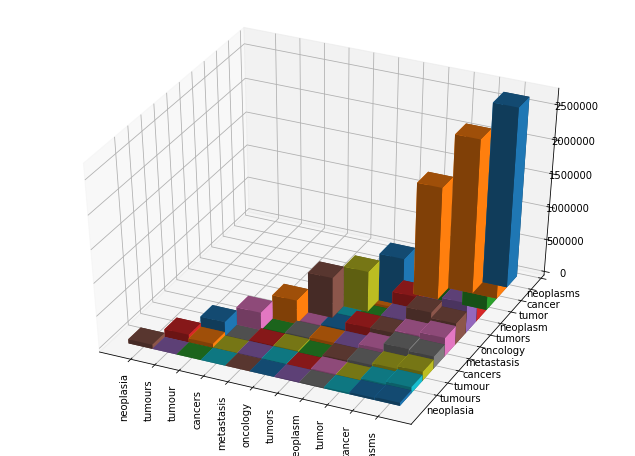

In [100]:
fig = plt.figure( figsize=(11, 8))
from mpl_toolkits.mplot3d import Axes3D 
ax = fig.add_subplot(111, projection='3d')
for i in np.arange(0,numKeyWords):
    currentColor = i/numKeyWords
    for j in np.arange(i,numKeyWords):
        #ax.bar3d(i,j,combinedEntries[i,j],[1,1,1],[1,1,1],[1,1,1],shade=True)
        ax.bar3d(i,j,0,1,1,(combinedEntries[i,j]),shade=True)
        #print(combinedEntries[i,j])
ax.view_init(40, 115)
ax.xaxis.set_ticks(0.5+np.arange(0,numKeyWords))
ax.yaxis.set_ticks(np.arange(0,numKeyWords)-0.5)
ax.xaxis.set_ticklabels((CancerKeyWords))
ax.yaxis.set_ticklabels((CancerKeyWords))   
ax.tick_params(axis='x', rotation=90)

The display of the bars with Matplotlib is not very good ... if you google around you will see lots and lots of complaints about this.